## Import necesssary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# Load the dataset

In [2]:
df=pd.read_csv("Data.csv")
df.head()

Country   Age Salary Purchased   Color
0   France  44.0  72000        No     Red
1    Spain  27.0  48000       Yes  Yellow
2  Germany  30.0  54000        No   Green
3    Spain  38.0  61000        No   Green
4  Germany  40.0     na       Yes  Yellow

# Data Preprocessing

## Convert salary feature to numeric data

In [3]:
df.Salary=pd.to_numeric(df.Salary, errors='coerce')
df.Salary.head()

0    72000.0
1    48000.0
2    54000.0
3    61000.0
4        NaN
Name: Salary, dtype: float64

## Find the null values for each column

In [4]:
df.isnull().sum()

Country       0
Age           6
Salary        9
Purchased    12
Color         0
dtype: int64

## Fill the missing values of numeric data

In [5]:
df.Salary=df.Salary.fillna(np.mean(df.Salary))
df.Age=df.Age.fillna(np.mean(df.Age))
df.head()

Country   Age        Salary Purchased   Color
0   France  44.0  72000.000000        No     Red
1    Spain  27.0  48000.000000       Yes  Yellow
2  Germany  30.0  54000.000000        No   Green
3    Spain  38.0  61000.000000        No   Green
4  Germany  40.0  62054.054054       Yes  Yellow

## Fill the missing values of categorical data

In [6]:
df.Purchased=df.Purchased.fillna(df.Purchased.value_counts().index[0])
df.Purchased.head()

0     No
1    Yes
2     No
3     No
4    Yes
Name: Purchased, dtype: object

## Rechecking missing values

In [28]:
df.isnull().sum()

Country      0
Age          0
Salary       0
Purchased    0
Color        0
dtype: int64

## One hot encoding

In [7]:
df2=pd.get_dummies(df, columns=["Country","Color","Purchased"])
df2.head()

Age        Salary  Country_France  Country_Germany  Country_Spain  \
0  44.0  72000.000000               1                0              0   
1  27.0  48000.000000               0                0              1   
2  30.0  54000.000000               0                1              0   
3  38.0  61000.000000               0                0              1   
4  40.0  62054.054054               0                1              0   

   Color_Green  Color_Red  Color_Yellow  Purchased_No  Purchased_Yes  
0            0          1             0             1              0  
1            0          0             1             0              1  
2            1          0             0             1              0  
3            1          0             0             1              0  
4            0          0             1             0              1

## Scaling the values for Age And Salary

In [ ]:
df[["Age","Salary"]]=MinMaxScaler().fit_transform(df[["Age","Salary"]])
df.head()

## Age vs Salary Scatter plot

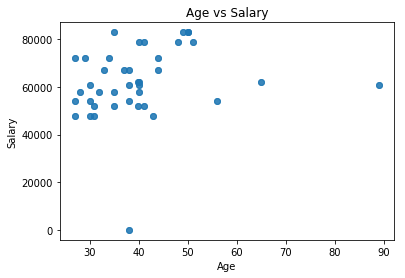

In [9]:
x =df.Age
y =df.Salary
plt.scatter(x, y,alpha=0.5)
plt.title("Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show();

## Country vs Purchased Scatter plot

In [15]:
x =df.Country
y =df.Purchased
plt.scatter(x, y)
plt.title("Country vs Purchased")
plt.xlabel("Country")
plt.ylabel("Purchased")
plt.show()

# Chi- square Test

## hypotheses
 - H0: Color preference is not associated with country, and
 - H1: Color preference is associated with country

## Contigency Matrix

In [ ]:

a = [[0, 0, 0,0]
     ,[0,0,0,0]
     ,[0,0,0,0]
     ,[0,0,0,0]]
for index, row in df.iterrows():
    if (row['Country']=='France'):
        if (row['Color']=='Red'):
            a[0][0] += 1
        if (row['Color']=='Yellow'):
            a[1][0] += 1
        if (row['Color']=='Green'):
            a[2][0] += 1
    if (row['Country']=='Spain'):
        if (row['Color']=='Red'):
            a[0][1] += 1
        if (row['Color']=='Yellow'):
            a[1][1] += 1
        if (row['Color']=='Green'):
            a[2][1] += 1
    if (row['Country']=='Germany'):
        if (row['Color']=='Red'):
            a[0][2] += 1
        if (row['Color']=='Yellow'):
            a[1][2] += 1
        if (row['Color']=='Green'):
            a[2][2] += 1
            
a

## Augmented contingency matrix

In [17]:
a[3][3] = sum(a[0])+sum(a[1])+sum(a[2])

a[0][3]=sum(a[0])
a[1][3]=sum(a[1])
a[2][3]=sum(a[2])

a[3][0] = sum( a[i][0] for i in range(0,3))
a[3][1] = sum( a[i][1] for i in range(0,3))
a[3][2] = sum( a[i][2] for i in range(0,3))


            
print("The augmented contingency matrix:\n",a[0],"\n",a[1],"\n",a[2],"\n",a[3])

The augmented contingency matrix:
 [33, 12, 3, 48] 
 [12, 15, 12, 39] 
 [3, 9, 21, 33] 
 [48, 36, 36, 120]


## Expected frequency matrix

In [18]:

n = a[3][3]

e = [[0,0,0],[0,0,0],[0,0,0]]

for i in range(3):
    for j in range(3):
        e[i][j] = (a[3][j]*a[i][3])/n
        
            
print("The expected frequency matrix:\n",e[0],"\n",e[1],"\n",e[2])

The expected frequency matrix:
 [19.2, 14.4, 14.4] 
 [15.6, 11.7, 11.7] 
 [13.2, 9.9, 9.9]


## chi-squared test with similar proportions

In [19]:

chisq = 0

for i in range(3):
    for j in range(3):
        chisq +=  ( ((a[i][j] - e[i][j] )**2 )/e[i][j] )
        
chisq

41.52207167832168

## Degree of freedom

In [20]:
dof = (3-1)*(3-1)
print("Degrees of Freedom: {}".format(dof))

Degrees of Freedom: 4


## Critical value

In [22]:
critical_value=chi2.ppf(0.1,df=dof)
critical_value

1.0636232167792237

## P value

In [26]:
p_value=1-chi2.cdf(x=chisq ,df=dof)
p_value

2.095444973093663e-08

## Interpret results

In [25]:
if(chisq>=critical_value):
    print("H0 has been rejected.\n Accepted: Color preference is not associated with country")
else:
    print("H1 has been rejected.\n Accepted: Color preference is associated with country")

H0 has been rejected.
 Accepted:Color preference is not associated with country
